In [22]:
from typing import Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data_150 = pd.read_csv('Exp_Data/Exp_Door_DistinctSamples20_MaxSteps10000_Repi10_pop150.csv')
data_200 = pd.read_csv('Exp_Data/Exp_Door_DistinctSamples20_MaxSteps10000_Repi10_pop200.csv')


In [30]:
print(data_150.head(1))
print(data_200.head(1))

   Unnamed: 0  door_size  Run  Evacuation percentage  Evacuation time  \
0           0        0.6  150              84.666667            97.81   

       Flow  Mean exit time  std exit time  population  
0  1.309635       46.903307      27.615585         150  
   Unnamed: 0  door_size  Run  Evacuation percentage  Evacuation time  \
0           0        0.6  200                   75.5            98.96   

       Flow  Mean exit time  std exit time  population  
0  1.530612       44.182185      24.224086         200  


In [27]:
df = pd.read_csv('SA_Data/OFAT_DistinctSamples20_MaxSteps10000_Repi10.csv')
data_100 = df[df['door_size'] > 0]
print(len(data_100))
print(data_100.head(1))


200
     Unnamed: 0  population  Run  Evacuation percentage  Evacuation time  \
400           0         NaN    0                   83.0             99.5   

         Flow  Mean exit time  std exit time  relaxation_time  door_size  
400  0.839476       51.374217      29.556392              NaN        0.6  


In [48]:
# plot together function
def plot_3pop(param,df100,df150,df200):
    plt.figure(figsize=(8,6),dpi=200)

    x1 = df100.groupby("door_size").mean().reset_index()["door_size"]
    y1 = df100.groupby("door_size").mean()[param]
    x2 = df150.groupby("door_size").mean().reset_index()["door_size"]
    y2 = df150.groupby("door_size").mean()[param]
    x3 = df200.groupby("door_size").mean().reset_index()["door_size"]
    y3 = df200.groupby("door_size").mean()[param]
    
    replicates1 = df100[param].count()
    replicates2 = df150[param].count()
    replicates3 = df200[param].count()

    err1 = (1.96 * df100[param].std()) / np.sqrt(replicates1)
    err2 = (1.96 * df150[param].std()) / np.sqrt(replicates2)
    err3 = (1.96 * df200[param].std()) / np.sqrt(replicates3)

    plt.plot(x1, y1, c='green',label = 'Pop = 100')
    plt.fill_between(x1, y1 - err1, y1 + err1,color='green',alpha=0.2)
    plt.plot(x2, y2, c='red',label = 'Pop = 150')
    plt.fill_between(x2, y2 - err2, y2 + err2,color='red',alpha=0.2)
    plt.plot(x3, y3, c='orange',label = 'Pop = 200')
    plt.fill_between(x3, y3 - err3, y3 + err3,color='orange',alpha=0.2)

    plt.xlabel('size of exit', fontsize=12)
    plt.ylabel(param, fontsize=12)
    plt.legend()

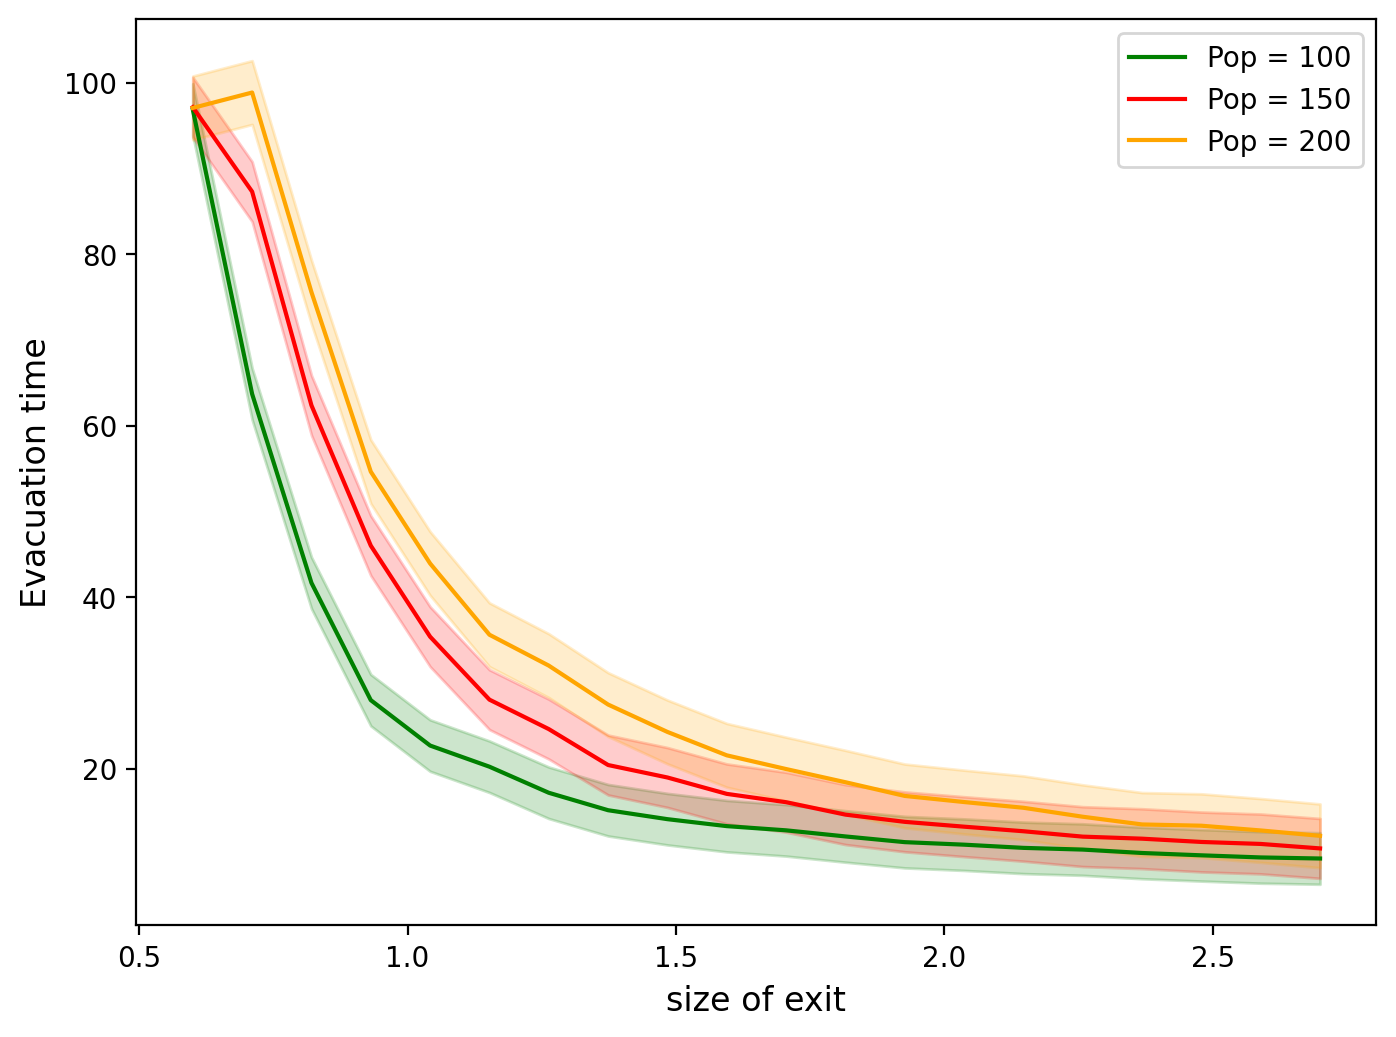

In [50]:
plot_3pop('Evacuation time',data_100,data_150,data_200)

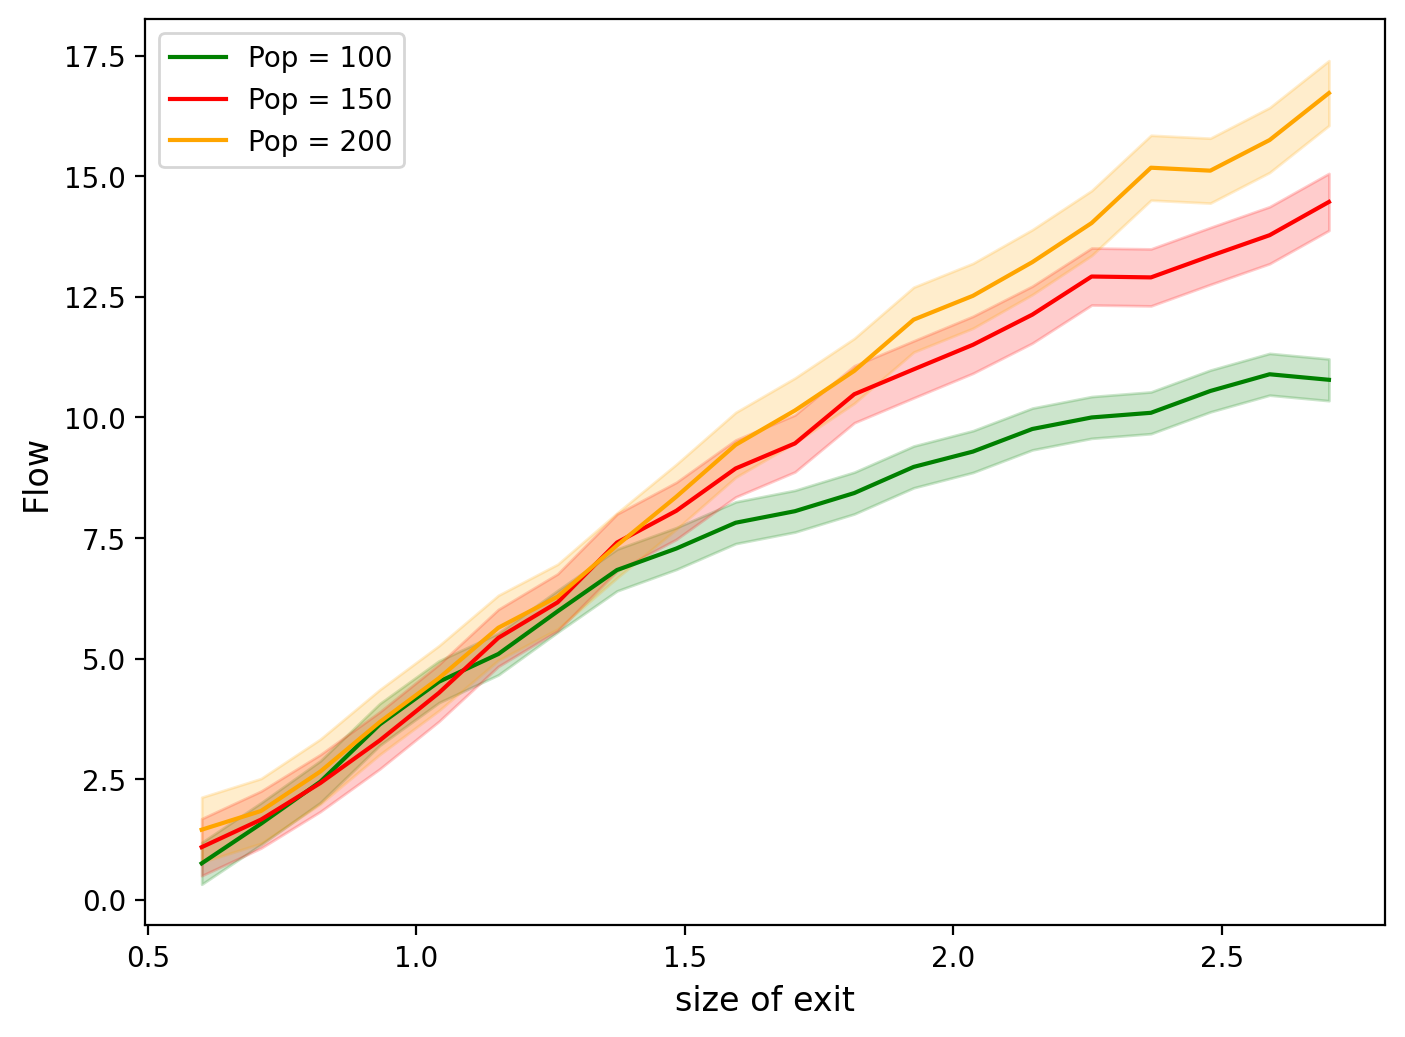

In [51]:
plot_3pop('Flow',data_100,data_150,data_200)

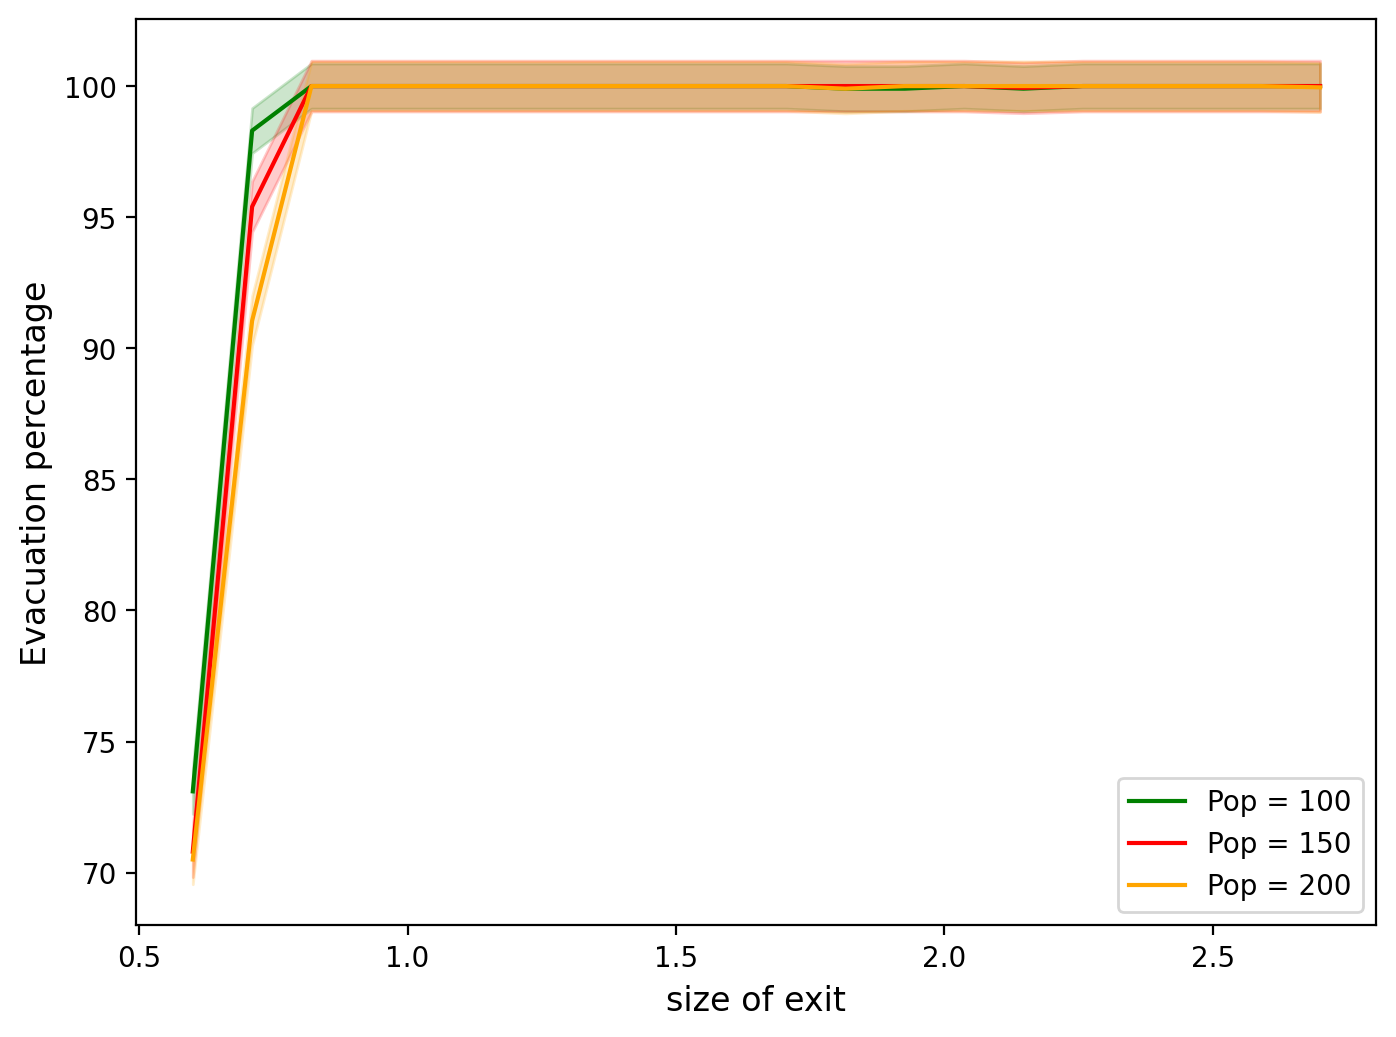

In [53]:
plot_3pop('Evacuation percentage',data_100,data_150,data_200)